In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from plotnine import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [128]:
#uploading the data
mart_test = pd.read_csv('Test.csv')
mart_train = pd.read_csv('Train.csv')
mart_train.head(5)



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [129]:
#data structure
mart_train.shape, mart_test.shape



((8523, 12), (5681, 11))

C:\Users\gufra\AppData\Roaming\Python\Python310\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 59'. Pick better value with 'binwidth'.


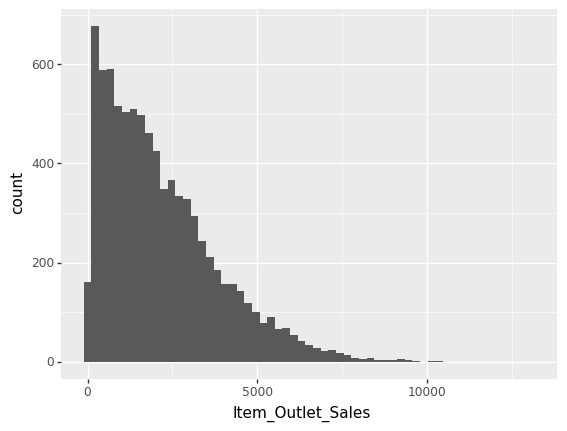

<ggplot: (138649920398)>

In [130]:
#target value
ggplot(mart_train, aes(x = 'Item_Outlet_Sales')) + geom_histogram()


C:\Users\gufra\AppData\Roaming\Python\Python310\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 22'. Pick better value with 'binwidth'.
C:\Users\gufra\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_bin : Removed 1463 rows containing non-finite values.


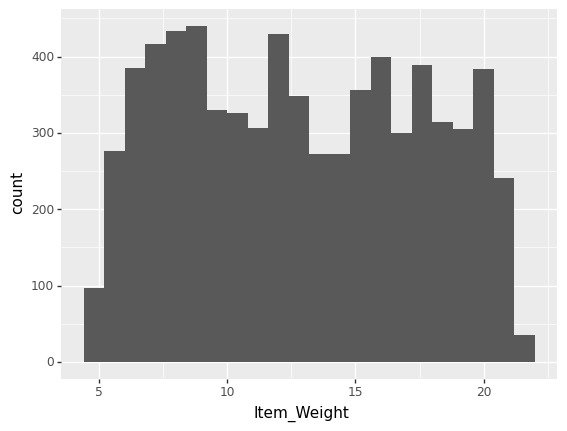

<ggplot: (138652961453)>

In [131]:
#numeric values

ggplot(mart_train, aes(x = 'Item_Weight')) + geom_histogram()


C:\Users\gufra\AppData\Roaming\Python\Python310\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 50'. Pick better value with 'binwidth'.


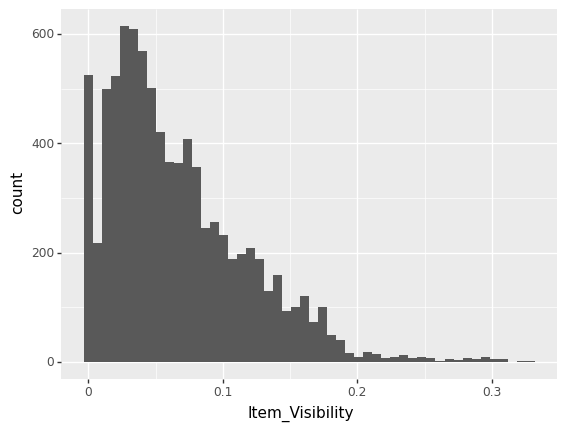

<ggplot: (138649246492)>

In [132]:
ggplot(mart_train, aes(x = 'Item_Visibility')) + geom_histogram()


C:\Users\gufra\AppData\Roaming\Python\Python310\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 27'. Pick better value with 'binwidth'.


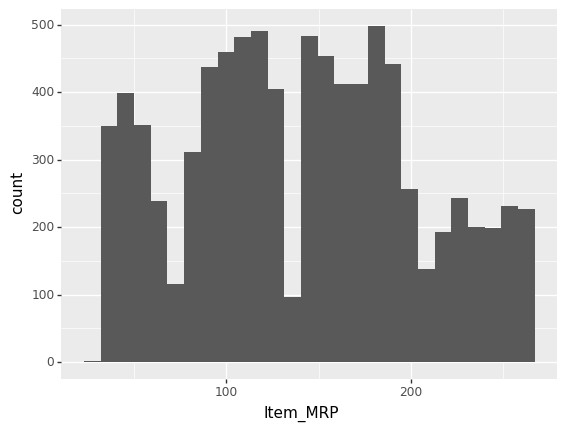

<ggplot: (138652899142)>

In [133]:
ggplot(mart_train, aes(x = 'Item_MRP')) + geom_histogram()


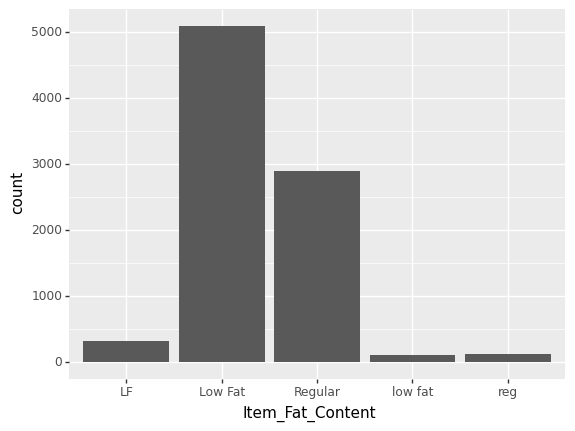

<ggplot: (138653173142)>

In [134]:
#categorical variables
ggplot(mart_train) +  geom_bar(aes(x = 'Item_Fat_Content'))

In [135]:
mart_train['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [136]:
mart_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
mart_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

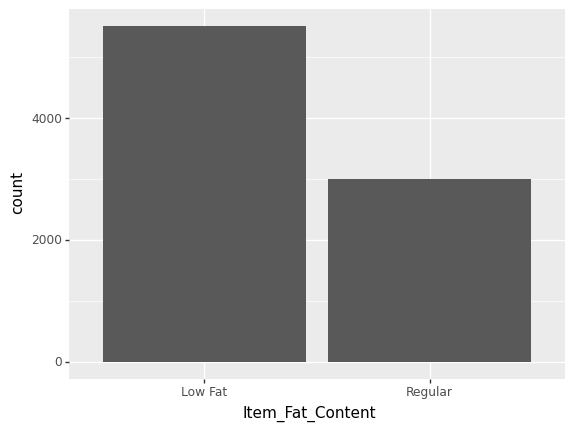

<ggplot: (138653200381)>

In [137]:
#after removing irregularities 
ggplot(mart_train) +  geom_bar(aes(x = 'Item_Fat_Content'))

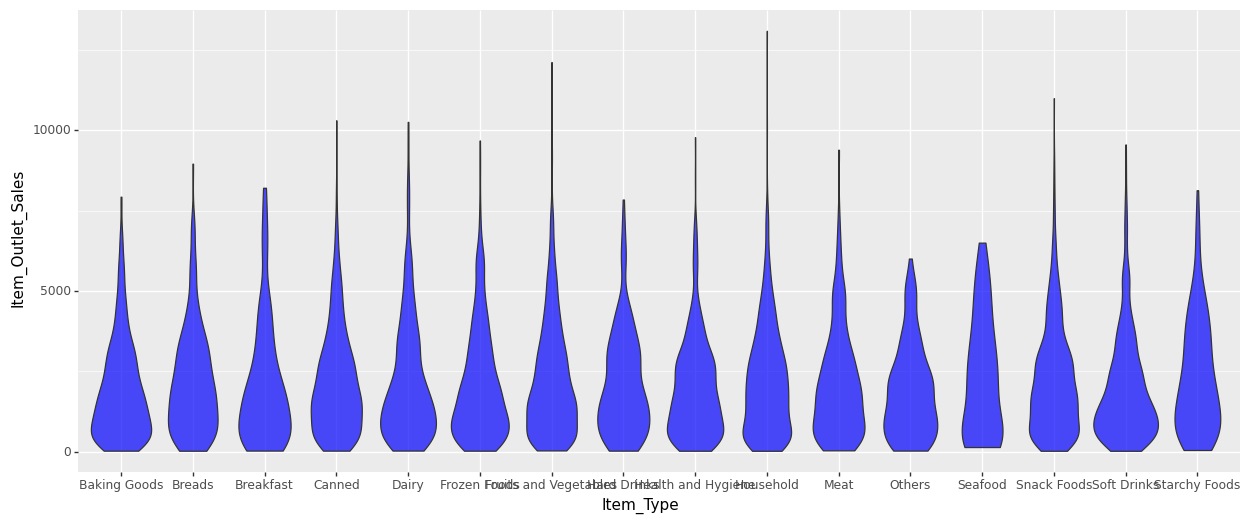

<ggplot: (138652944225)>

In [138]:
#visualise the categorical variables with respect to target variable

(ggplot(mart_train, aes('Item_Type', 'Item_Outlet_Sales'))
 + geom_violin(mart_train, alpha = 0.7, fill= 'blue' , size=0.5, show_legend=False)   + theme(figure_size=(15, 6))

)

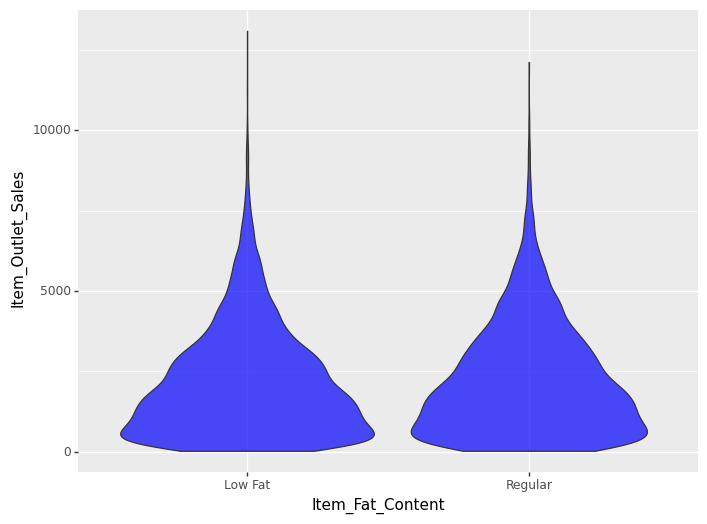

<ggplot: (138652907319)>

In [139]:
(ggplot(mart_train, aes('Item_Fat_Content', 'Item_Outlet_Sales'))
 + geom_violin(mart_train, alpha = 0.7, fill='blue',  size=0.5, show_legend=False)   + theme(figure_size=(8, 6))

)

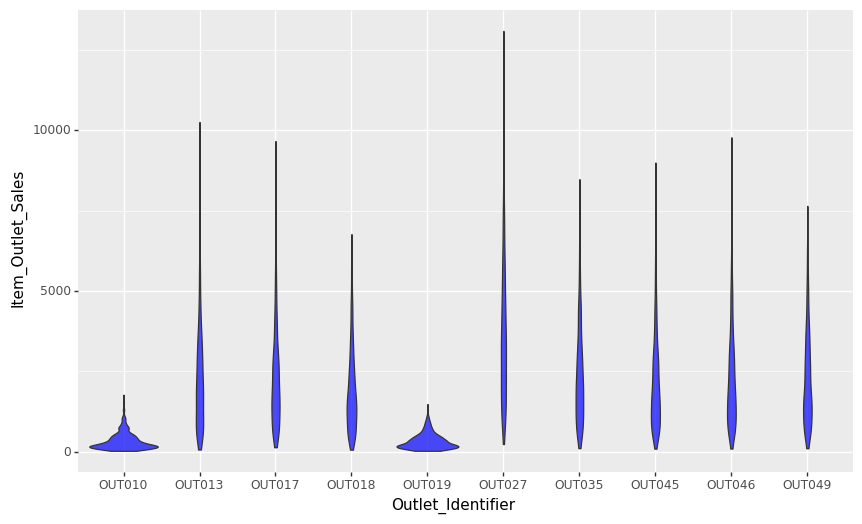

<ggplot: (138654677089)>

In [140]:
(ggplot(mart_train, aes('Outlet_Identifier', 'Item_Outlet_Sales'))
 + geom_violin(mart_train, alpha = 0.7, fill='blue', size=0.5, show_legend=False)   + theme(figure_size=(10, 6))

)

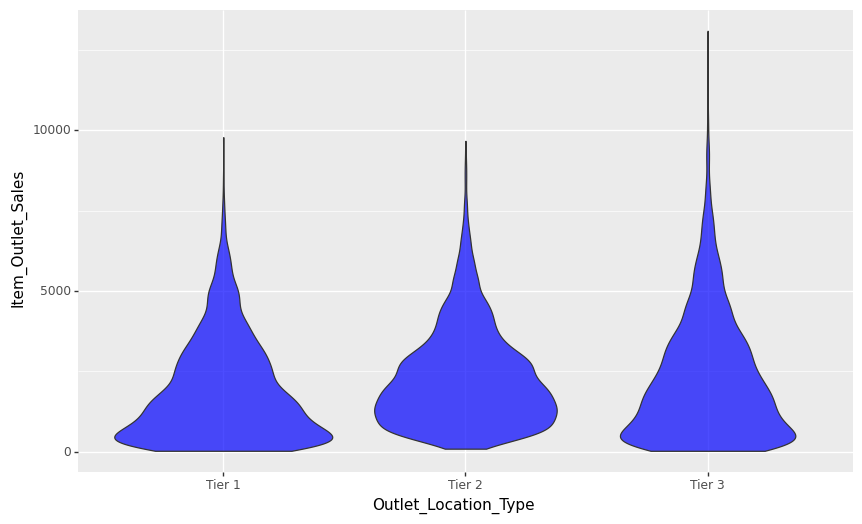

<ggplot: (138654718802)>

In [141]:
(ggplot(mart_train, aes('Outlet_Location_Type', 'Item_Outlet_Sales'))
 + geom_violin(mart_train, alpha = 0.7, fill='blue',  size=0.5, show_legend=False)   + theme(figure_size=(10, 6))

)

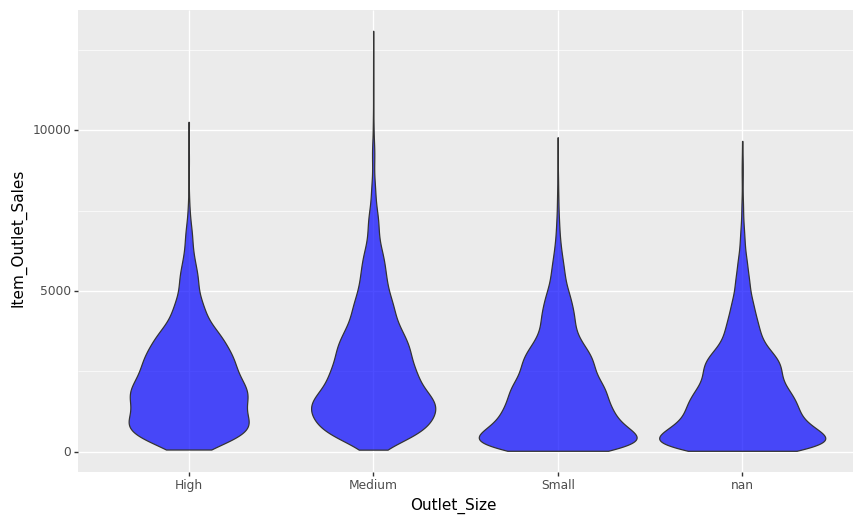

<ggplot: (138649235417)>

In [142]:
(ggplot(mart_train, aes('Outlet_Size', 'Item_Outlet_Sales'))
 + geom_violin(mart_train, alpha = 0.7,  size=0.5, fill= 'blue', show_legend=False)   + theme(figure_size=(10, 6))

)

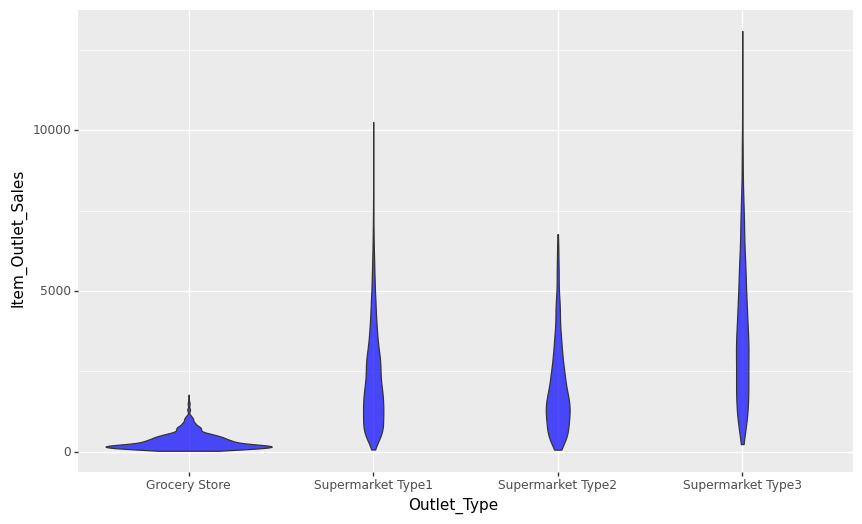

<ggplot: (138654706133)>

In [143]:
(ggplot(mart_train, aes('Outlet_Type', 'Item_Outlet_Sales'))
 + geom_violin(mart_train, alpha = 0.7, fill = 'blue' , size=0.5, show_legend=False)   + theme(figure_size=(10, 6))

)

In [144]:
#null values in train
mart_train.isnull().sum()

#present in two colmuns

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [145]:
#null values in test
mart_test.isnull().sum()

#present in two columns

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [146]:
mart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [147]:
#treating null values

mart_train['Outlet_Size'] =  mart_train['Outlet_Size'].fillna(mart_train['Outlet_Size'].mode()[0])
mart_test['Outlet_Size'] =  mart_test['Outlet_Size'].fillna(mart_test['Outlet_Size'].mode()[0])

In [148]:
#treating null values
mart_train['Item_Weight'] =  mart_train['Item_Weight'].fillna(mart_train['Item_Weight'].mean())
mart_test['Item_Weight'] =  mart_test['Item_Weight'].fillna(mart_test['Item_Weight'].mean())

In [149]:
# test after removing null values
mart_test.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [150]:
#train after removing null values
mart_train.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot: xlabel='Item_Weight'>

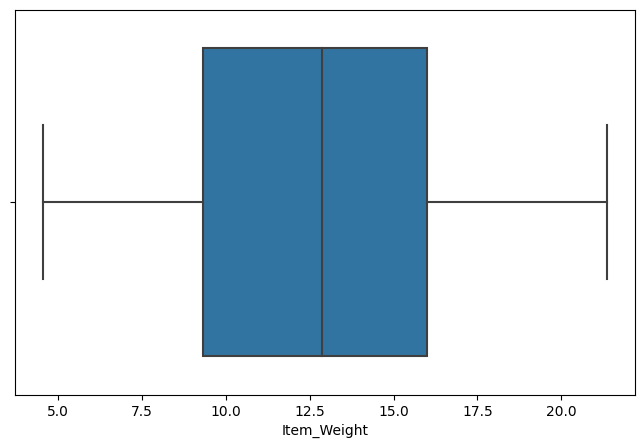

In [151]:
#checking outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=mart_train['Item_Weight'])

In [152]:
mart_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [153]:
mart_train = mart_train.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)
mart_test = mart_test.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)

In [154]:
#encoding train
for col in mart_train.columns:
    if mart_train[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(mart_train[col].values))
        mart_train[col]=lbl.transform(mart_train[col].values)
        
# Encoding test

for coll in mart_test.columns:
    if mart_test[coll].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(mart_test[coll].values))
        mart_test[coll]=lbl.transform(mart_test[coll].values)

In [155]:
mart_train.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [156]:
#splitting the data 
x=mart_train.drop('Item_Outlet_Sales',axis=1)
y=mart_train['Item_Outlet_Sales']

In [157]:
#scalling data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [158]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
#modeling and testing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.externals import pickle



In [160]:
#linear reggression
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
r1 = r2_score(y_test,y_pred)
filename = 'linearRegression_model.sav'
joblib.dump(lr, open(filename, 'wb'))


In [161]:
#xgboot
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
r2 = r2_score(y_test, y_pred)
filename = 'rxgboot_model.sav'
joblib.dump(xgb, open(filename, 'wb'))

In [162]:
#random forest 
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)

filename = 'random_forest.sav'
joblib.dump(rf, open(filename, 'wb'))

In [163]:
#rigid reggeression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#initialising model object
ridge = Ridge()

# cross validation. taking 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [164]:
print(model_cv.best_params_)


{'alpha': 100}


In [165]:
alpha = 100
ridge = Ridge(alpha=alpha)

#fitting the model
ridge.fit(x_train, y_train)

#printing the intercept and coefficients
print(ridge.intercept_)
print(ridge.coef_)


2179.0133069228514
[  -7.72034532   22.05765651  -87.10182914    2.67745206  905.1534035
    7.48647538 -149.47220524 -254.55483729  705.08619314]


In [172]:
y_pred = ridge.predict(x_test)

r4 = r2_score(y_test, y_pred)

filename = 'rige_model.sav'
joblib.dump(ridge, open(filename, 'wb'))

NameError: name 'joblib' is not defined

In [168]:
metric_results= {'Model': ['linear Regression',  'xgboot','RandomForest','rigid reggerission'], 
                 'R Square': [r1, r2, r3,r4]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.510595
1,xgboot,0.502660
2,RandomForest,0.549803
3,rigid reggerission,0.506282


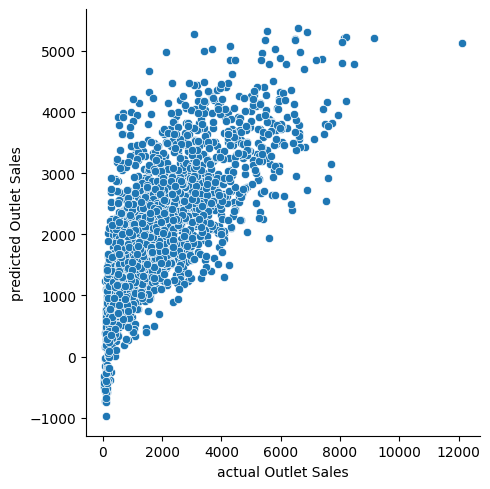

In [169]:
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')